Filter Featur Selection

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df = pd.read_csv('/content/drive/My Drive/Kuliah/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Feature Selection Menggunakan Pearson Correlation

In [24]:
corr_pearson = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

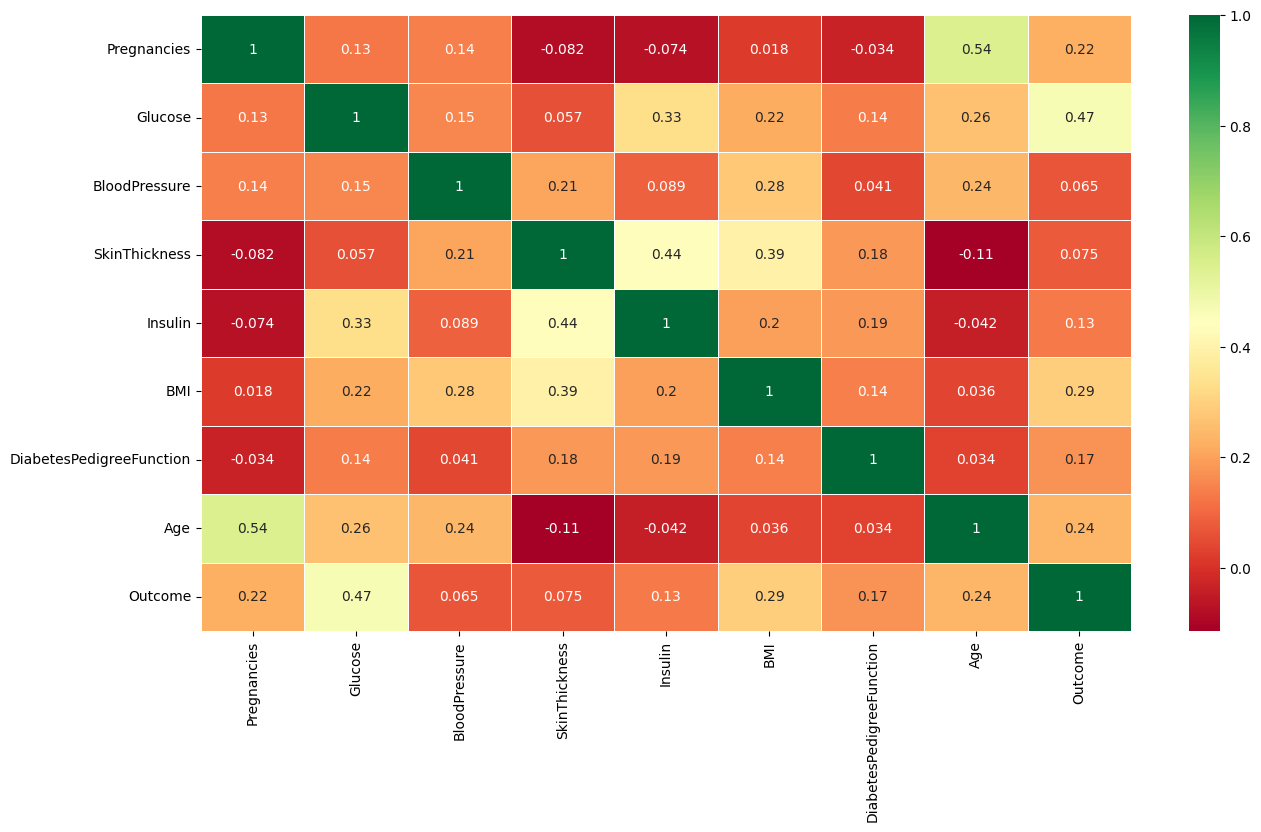

In [25]:
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show

Feature Selection Menggunakan Chi Squere

In [26]:
df_feature = df.drop('Outcome', 1)
sr_outcome = df['Outcome']

<ipython-input-26-d92468e3eac3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_feature = df.drop('Outcome', 1)


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(df_feature, sr_outcome)

cols = chi2_selector.get_support(indices=True)
df_selected_features = df_feature.iloc[:, cols]

In [28]:
df_selected_features.head()

,Pregnancies,Glucose,Insulin,BMI,Age
0,6,148,0,33.6,50
1,1,85,0,26.6,31
2,8,183,0,23.3,32
3,1,89,94,28.1,21
4,0,137,168,43.1,33


In [29]:
from sklearn.feature_selection import RFE

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [31]:
rfe = RFE(model_rf, n_features_to_select=4, step=1)
fit = rfe.fit(df_feature, sr_outcome)

print("Num Features: %s" % (fit.n_features_))
print("Selectes Features: %s"%(fit.support_))

Num Features: 4
Selectes Features: [False  True False False False  True  True  True]


In [32]:
df_selected_features = df_feature.iloc[:,fit.support_]
df_selected_features.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148,33.6,0.627,50
1,85,26.6,0.351,31
2,183,23.3,0.672,32
3,89,28.1,0.167,21
4,137,43.1,2.288,33
